In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
import statsmodels.api as sm
py.offline.init_notebook_mode(connected=True)

In [2]:
stats = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\county_facts.csv" , )
pd.set_option('display.max_columns', 50)
stats.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,...,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,...,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,...,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,...,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,...,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,...,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [3]:
stats.shape

(3195, 54)

In [4]:
stats12 = stats[['fips','area_name','state_abbreviation','PST045214','AGE775214','RHI225214','RHI725214','RHI825214','EDU635213','EDU685213','INC110213','PVY020213','POP060210','RHI425214','SBO001207','SEX255214']].copy()
stats12.rename(columns={'PST045214': 'Population', 'AGE775214': 'Age > 65','RHI225214':'Black','RHI725214':'Latino','RHI825214':'White','EDU635213':'HighSchool','EDU685213':'College','INC110213':'Median Household','PVY020213':'Poverty level','POP060210':'Population PSMile', 'RHI425214':'Asian', 'SBO001207':'Firms','SEX255214':'Females'}, inplace=True)
stats12

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females
0,0,United States,NaN,318857056,14.5,13.2,17.4,62.1,86.0,28.8,53046,15.4,87.4,5.4,27092908,50.8
1,1000,Alabama,NaN,4849377,15.3,26.7,4.1,66.2,83.1,22.6,43253,18.6,94.4,1.3,382350,51.5
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4
3,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2
4,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,9.5,1.5,15.8,79.7,91.0,18.1,71525,11.3,4.2,0.9,4052,48.1
3191,56039,Teton County,WY,22930,12.2,1.2,15.2,80.9,96.8,48.7,68078,8.2,5.3,1.3,5974,48.2
3192,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6
3193,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3


In [5]:
#Drop US and States
stats12 = stats12.dropna()

In [6]:
stats12.head(10)

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4
3,1003,Baldwin County,AL,200111,18.7,9.6,4.6,83.0,89.1,27.7,50221,13.9,114.6,0.9,19035,51.2
4,1005,Barbour County,AL,26887,16.5,47.6,4.5,46.6,73.7,13.4,32911,26.7,31.0,0.5,1667,46.6
5,1007,Bibb County,AL,22506,14.8,22.1,2.1,74.5,77.5,12.1,36447,18.1,36.8,0.2,1385,45.9
6,1009,Blount County,AL,57719,17.0,1.8,8.7,87.8,77.0,12.1,44145,15.8,88.9,0.3,4458,50.5
7,1011,Bullock County,AL,10764,14.9,70.1,7.5,22.1,67.8,12.5,32033,21.6,17.5,0.3,417,45.3
8,1013,Butler County,AL,20296,18.0,44.0,1.2,53.1,76.3,14.0,29918,28.4,27.0,0.9,1769,53.6
9,1015,Calhoun County,AL,115916,16.0,21.1,3.5,72.9,78.6,16.1,39962,21.9,195.7,0.9,8713,51.8
10,1017,Chambers County,AL,34076,18.3,39.5,2.0,56.8,75.1,11.8,32402,24.1,57.4,0.8,1981,52.3
11,1019,Cherokee County,AL,26037,20.9,4.6,1.5,91.6,78.3,12.8,34907,21.2,46.9,0.3,2180,50.2


In [7]:
primary = pd.read_csv(r"C:\Users\Ahmed's Computer\Downloads\primary_results.csv", )
pd.set_option('display.max_columns', 50)
primary.head(7)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197


In [8]:
prim = pd.merge(stats12,primary)
prim

,fips,area_name,state_abbreviation,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,state,county,party,candidate,votes,fraction_votes
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Democrat,Bernie Sanders,544,0.182
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Democrat,Hillary Clinton,2387,0.800
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Republican,Ben Carson,1764,0.146
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Republican,Donald Trump,5387,0.445
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Alabama,Autauga,Republican,John Kasich,421,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Wyoming,Uinta,Democrat,Hillary Clinton,4,0.444
17475,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Wyoming,Washakie,Democrat,Bernie Sanders,1,0.333
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Wyoming,Washakie,Democrat,Hillary Clinton,2,0.667
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Wyoming,Weston,Democrat,Bernie Sanders,1,0.500


In [9]:
prim.drop(['county', 'state'], axis=1, inplace=True)
prim = prim.rename(columns={'state_abbreviation': 'State','area_name':'county'})

In [10]:
prim

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes
0,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Bernie Sanders,544,0.182
1,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Democrat,Hillary Clinton,2387,0.800
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ben Carson,1764,0.146
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Donald Trump,5387,0.445
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,John Kasich,421,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,56041,Uinta County,WY,20904,11.0,0.9,9.2,87.3,89.2,18.9,58515,13.3,10.1,0.5,1983,49.6,Democrat,Hillary Clinton,4,0.444
17475,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Bernie Sanders,1,0.333
17476,56043,Washakie County,WY,8322,20.1,0.8,13.9,82.7,90.5,23.6,47104,12.1,3.8,0.7,845,49.3,Democrat,Hillary Clinton,2,0.667
17477,56045,Weston County,WY,7201,18.1,0.7,4.2,91.5,90.2,17.2,55461,11.2,3.0,0.4,810,47.4,Democrat,Bernie Sanders,1,0.500


### Split and Proprocessing

In [11]:
democrats_raw =  prim[prim.party == "Democrat"]
republicans_raw = prim[prim.party == "Republican"]

In [12]:
len(republicans_raw.fips.unique())

2711

In [13]:
republicans_raw

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ben Carson,1764,0.146
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Donald Trump,5387,0.445
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,John Kasich,421,0.035
5,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Marco Rubio,1785,0.148
6,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ted Cruz,2482,0.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426,55139,Winnebago County,WI,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,Republican,John Kasich,3952,0.115
17427,55139,Winnebago County,WI,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,Republican,Ted Cruz,16049,0.469
17430,55141,Wood County,WI,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,Republican,Donald Trump,6941,0.432
17431,55141,Wood County,WI,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,Republican,John Kasich,1479,0.092


In [14]:
republicans = republicans_raw.copy()
republicans = republicans.drop(['State','votes','party', 'county', 'fips'], axis=1)

In [15]:
republicans

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate,fraction_votes
2,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Ben Carson,0.146
3,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Donald Trump,0.445
4,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,John Kasich,0.035
5,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Marco Rubio,0.148
6,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Ted Cruz,0.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,John Kasich,0.115
17427,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,Ted Cruz,0.469
17430,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,Donald Trump,0.432
17431,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,John Kasich,0.092


In [16]:
train_data, test_data = train_test_split(republicans, test_size = .1, random_state = 0) 

In [17]:
y = train_data.fraction_votes
X = train_data.drop('fraction_votes', axis = 1)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=0)

In [19]:
from category_encoders.one_hot import OneHotEncoder

In [20]:
encoder = OneHotEncoder()
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)

In [21]:
X_train

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate_1,candidate_2,candidate_3,candidate_4,candidate_5,candidate_6,candidate_7,candidate_8,candidate_9,candidate_10,candidate_11
8877,29099,19.7,0.4,4.1,66.2,90.2,24.8,38019,22.4,19.3,0.5,2630,50.8,1,0,0,0,0,0,0,0,0,0,0
6549,20486,18.1,1.8,2.7,94.0,69.8,9.8,29497,24.3,45.4,0.4,1555,50.5,0,1,0,0,0,0,0,0,0,0,0
1352,207590,11.5,3.0,31.5,48.3,84.3,37.9,55918,19.1,197.9,13.8,14782,51.3,0,1,0,0,0,0,0,0,0,0,0
11687,69966,16.0,11.0,5.7,57.3,84.9,17.9,38502,22.9,87.6,0.7,5541,51.2,0,0,1,0,0,0,0,0,0,0,0
15534,51518,12.2,0.5,9.1,87.2,91.7,21.2,57292,8.8,8.7,1.0,3818,49.4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,401918,18.0,4.9,29.2,57.9,84.7,18.0,50027,15.6,70.0,1.9,15591,47.8,0,0,0,1,0,0,0,0,0,0,0
8038,20490,15.7,39.4,1.5,58.1,72.7,10.2,29925,28.4,25.6,0.2,1806,51.9,0,0,1,0,0,0,0,0,0,0,0
8392,32688,17.9,2.4,2.6,92.2,86.9,17.0,50527,9.5,53.1,0.5,3174,50.4,0,0,1,0,0,0,0,0,0,0,0
8033,48958,13.6,71.4,1.3,26.3,75.5,18.7,28093,37.3,70.6,0.7,4469,53.2,0,0,0,1,0,0,0,0,0,0,0


### Training

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score

In [23]:
#Train using training data
RFR = RandomForestRegressor(n_estimators=500)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
yhat = RFR.predict(X_val)

In [25]:
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_val, yhat)))
print("MAE: ", mean_absolute_error(y_val, yhat))
print("RMSE:", np.sqrt(mean_squared_error(y_val, yhat)))
print("R2: ", r2_score(y_val, yhat))
print("Median Error: ", np.median(abs(y_val - yhat)))

RMSLE:  0.067737239027727
MAE:  0.06250575731143307
RMSE: 0.0906387612766555
R2:  0.7772599218953626
Median Error:  0.04114800000000035


### Final Test

In [27]:
y_test = test_data.fraction_votes
X_test = test_data.drop('fraction_votes', axis = 1)

In [28]:
X_test = encoder.transform(X_test)

In [29]:
y_hat = RFR.predict(X_test)

In [30]:
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_test, y_hat)))
print("MAE: ", mean_absolute_error(y_test, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_hat)))
print("R2: ", r2_score(y_test, y_hat))
print("Median Error: ", np.median(abs(y_test - y_hat)))

RMSLE:  0.0675887647943203
MAE:  0.06214833765186436
RMSE: 0.09044691948208063
R2:  0.777896661979111
Median Error:  0.039412000000000044


In [31]:
final_data = test_data.copy()
final_data['Predictions'] = y_hat
final_data['dif_preds'] = abs(final_data['fraction_votes'] - final_data['Predictions'])

In [32]:
final_data

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate,fraction_votes,Predictions,dif_preds
15549,1117,21.2,0.4,4.2,93.0,86.0,18.8,46917,8.6,1.5,0.5,0,44.1,Donald Trump,0.351,0.601240,0.250240
14179,20684,19.4,9.5,33.9,56.0,76.8,12.4,46454,13.5,22.1,0.6,1509,47.9,Donald Trump,0.312,0.361548,0.049548
13415,7631,14.7,28.1,2.0,67.8,70.6,7.0,27115,31.7,47.2,0.2,189,36.1,Ben Carson,0.078,0.058052,0.019948
1560,199798,14.2,10.9,9.2,74.8,90.2,24.0,59482,9.8,315.8,3.2,15242,50.8,Marco Rubio,0.221,0.188214,0.032786
9563,5184,19.8,3.5,7.7,85.0,82.7,16.3,40143,17.3,0.5,0.8,409,46.0,Ben Carson,0.095,0.070182,0.024818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391,67676,16.6,1.7,1.5,92.5,93.5,29.1,45622,15.7,37.1,0.6,5273,49.6,Ted Cruz,0.273,0.243680,0.029320
7592,12629,21.0,40.9,1.0,57.3,74.7,11.6,30750,25.7,18.0,0.1,992,51.4,Donald Trump,0.520,0.505960,0.014040
2386,190761,13.6,8.1,27.5,61.9,78.8,22.8,50853,18.7,457.5,2.0,17307,50.1,Ted Cruz,0.278,0.317510,0.039510
5948,12875,17.5,0.7,4.0,94.0,75.5,8.2,35430,25.1,29.8,0.3,1008,50.6,Donald Trump,0.431,0.456892,0.025892


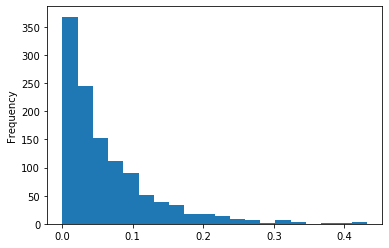

In [33]:
final_data['dif_preds'].plot.hist(bins=20)

In [34]:
RFR.feature_importances_

array([1.84229179e-02, 3.19187654e-02, 2.45358801e-02, 4.69641695e-02,
       1.79061640e-02, 2.98027717e-02, 2.64069341e-02, 2.04868958e-02,
       1.80452278e-02, 4.57344602e-02, 2.59414542e-02, 1.51199541e-02,
       1.56521463e-02, 4.91207822e-01, 4.81272137e-03, 1.10498648e-02,
       1.54290751e-01, 1.22646483e-03, 4.39006559e-05, 3.82010563e-05,
       4.48106032e-05, 1.58984659e-04, 1.11818392e-04, 7.69189991e-05])

In [35]:
#Im now making a new dataset based off of the 2016 primaires one. This dataset will represent the 2036 US Primaries dataset 
#and will contain all demographics but will not include result for obvious reasons. I am creating this dataset based off of
#The census predictions of demographics in the US. I will then use this dataset to test it for 'Results', based off of the 
#2016 dataset training


### 2032 Elections 

In [36]:
prim32_raw = republicans_raw.copy()
prim32_raw

,fips,county,State,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,party,candidate,votes,fraction_votes
2,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ben Carson,1764,0.146
3,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Donald Trump,5387,0.445
4,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,John Kasich,421,0.035
5,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Marco Rubio,1785,0.148
6,1001,Autauga County,AL,55395,13.8,18.7,2.7,75.6,85.6,20.9,53682,12.1,91.8,1.1,4067,51.4,Republican,Ted Cruz,2482,0.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426,55139,Winnebago County,WI,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,Republican,John Kasich,3952,0.115
17427,55139,Winnebago County,WI,169511,14.7,2.0,3.9,89.6,91.0,25.5,51010,12.3,384.3,2.7,10710,49.7,Republican,Ted Cruz,16049,0.469
17430,55141,Wood County,WI,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,Republican,Donald Trump,6941,0.432
17431,55141,Wood County,WI,73608,18.6,0.7,2.7,93.1,90.8,18.8,47685,11.0,94.2,2.0,6203,50.6,Republican,John Kasich,1479,0.092


In [37]:
prim32 = prim32_raw.copy()

In [38]:
prim32['Population'] = prim['Population'] * 1.0990
prim32['Age > 65'] = prim['Age > 65'] * 1.3519
prim32['White'] = prim['White'] * .9737
prim32['Black'] = prim['Black'] * 1.0376
prim32['Latino'] = prim['Latino'] * 1.1854
prim32['Asian'] = prim['Asian'] * 1.2105

In [39]:
prim32.drop(['fraction_votes', 'fips', 'county', 'State', 'party', 'votes'], axis=1, inplace=True)

In [40]:
prim32 = encoder.transform(prim32)

In [41]:
prim32

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate_1,candidate_2,candidate_3,candidate_4,candidate_5,candidate_6,candidate_7,candidate_8,candidate_9,candidate_10,candidate_11
2,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,0,0,0,0,1,0,0,0,0,0,0
3,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,1,0,0,0,0,0,0,0,0,0,0
4,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,0,1,0,0,0,0,0,0,0,0,0
5,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,0,0,1,0,0,0,0,0,0,0,0
6,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426,186292.589,19.87293,2.07520,4.62306,87.24352,91.0,25.5,51010,12.3,384.3,3.26835,10710,49.7,0,1,0,0,0,0,0,0,0,0,0
17427,186292.589,19.87293,2.07520,4.62306,87.24352,91.0,25.5,51010,12.3,384.3,3.26835,10710,49.7,0,0,0,1,0,0,0,0,0,0,0
17430,80895.192,25.14534,0.72632,3.20058,90.65147,90.8,18.8,47685,11.0,94.2,2.42100,6203,50.6,1,0,0,0,0,0,0,0,0,0,0
17431,80895.192,25.14534,0.72632,3.20058,90.65147,90.8,18.8,47685,11.0,94.2,2.42100,6203,50.6,0,1,0,0,0,0,0,0,0,0,0


In [42]:
preds32 = RFR.predict(prim32)

In [43]:
prim32 = encoder.inverse_transform(prim32)

In [44]:
prim32

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate
2,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Ben Carson
3,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Donald Trump
4,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,John Kasich
5,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Marco Rubio
6,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Ted Cruz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426,186292.589,19.87293,2.07520,4.62306,87.24352,91.0,25.5,51010,12.3,384.3,3.26835,10710,49.7,John Kasich
17427,186292.589,19.87293,2.07520,4.62306,87.24352,91.0,25.5,51010,12.3,384.3,3.26835,10710,49.7,Ted Cruz
17430,80895.192,25.14534,0.72632,3.20058,90.65147,90.8,18.8,47685,11.0,94.2,2.42100,6203,50.6,Donald Trump
17431,80895.192,25.14534,0.72632,3.20058,90.65147,90.8,18.8,47685,11.0,94.2,2.42100,6203,50.6,John Kasich


In [45]:
prim32['Predictions'] = preds32 
prim32['fips'] = prim32_raw[prim32_raw.party == "Republican"]['fips']

In [46]:
prim32

,Population,Age > 65,Black,Latino,White,HighSchool,College,Median Household,Poverty level,Population PSMile,Asian,Firms,Females,candidate,Predictions,fips
2,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Ben Carson,0.072322,1001
3,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Donald Trump,0.447538,1001
4,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,John Kasich,0.072764,1001
5,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Marco Rubio,0.194258,1001
6,60879.105,18.65622,19.40312,3.20058,73.61172,85.6,20.9,53682,12.1,91.8,1.33155,4067,51.4,Ted Cruz,0.236000,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426,186292.589,19.87293,2.07520,4.62306,87.24352,91.0,25.5,51010,12.3,384.3,3.26835,10710,49.7,John Kasich,0.173650,55139
17427,186292.589,19.87293,2.07520,4.62306,87.24352,91.0,25.5,51010,12.3,384.3,3.26835,10710,49.7,Ted Cruz,0.211314,55139
17430,80895.192,25.14534,0.72632,3.20058,90.65147,90.8,18.8,47685,11.0,94.2,2.42100,6203,50.6,Donald Trump,0.505142,55141
17431,80895.192,25.14534,0.72632,3.20058,90.65147,90.8,18.8,47685,11.0,94.2,2.42100,6203,50.6,John Kasich,0.120810,55141


In [47]:
fips = prim32.fips.unique()

In [48]:
len(fips)

2711

In [49]:
results = pd.DataFrame(columns=['fips','candidate','Predictions'])
for fip in fips:
    temp_df = prim32[prim32.fips == fip][['fips','candidate','Predictions']].reset_index(drop=True)
    winner = temp_df['Predictions'].argmax()
    results = results.append(temp_df.loc[winner], ignore_index=True)


In [50]:
results

,fips,candidate,Predictions
0,1001,Donald Trump,0.447538
1,1003,Donald Trump,0.496530
2,1005,Donald Trump,0.495840
3,1007,Donald Trump,0.482570
4,1009,Donald Trump,0.456326
...,...,...,...
2706,55133,Donald Trump,0.473594
2707,55135,Donald Trump,0.493358
2708,55137,Donald Trump,0.452658
2709,55139,Donald Trump,0.532224


In [51]:
final = pd.merge(prim32_raw[['fips', 'county']].drop_duplicates(), results, 'inner')

In [52]:
final

,fips,county,candidate,Predictions
0,1001,Autauga County,Donald Trump,0.447538
1,1003,Baldwin County,Donald Trump,0.496530
2,1005,Barbour County,Donald Trump,0.495840
3,1007,Bibb County,Donald Trump,0.482570
4,1009,Blount County,Donald Trump,0.456326
...,...,...,...,...
2706,55133,Waukesha County,Donald Trump,0.473594
2707,55135,Waupaca County,Donald Trump,0.493358
2708,55137,Waushara County,Donald Trump,0.452658
2709,55139,Winnebago County,Donald Trump,0.532224


In [53]:
final.candidate.value_counts()

Donald Trump    2592
Ted Cruz         117
Marco Rubio        2
Name: candidate, dtype: int64

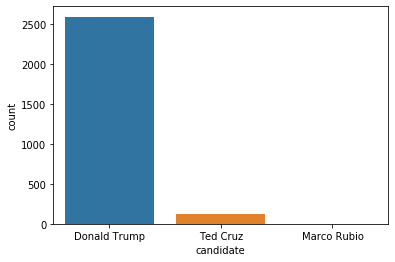

In [55]:
sns.countplot(x='candidate', data=final)